# Unsupervised Data

## 1. Clustering

**Clustering** is modeling withouth labels. How can we know it did well if we don't have results?  

First thing to do is find orders and patterns to the data.

* Goals: 
    * Minimize distance between all points in a given cluster.
    * Maximize the distance between cluster centers (__centeroids__)  

How do we measure model performance?  

* measure based on patterns found
    * _External Index:_ Compares the distribution and boundaries of on cluster to other clusters.
    * _Internal Index:_ Looks at the distribution of points within the cluster *independent* of other clusters.  
* We can evaluate patterns as we change parameters (what does it look like when we change num clusters)
    * Within-Cluster Sum of Squares (WCSS) and the Elbow Method
    * Others include Sillhouette Index, Dunn Index, R-Squared index, Davies-Bouldin Index, Hartigan index, Root-Mean-Square standard deviation (RMSSTD)  
    
    



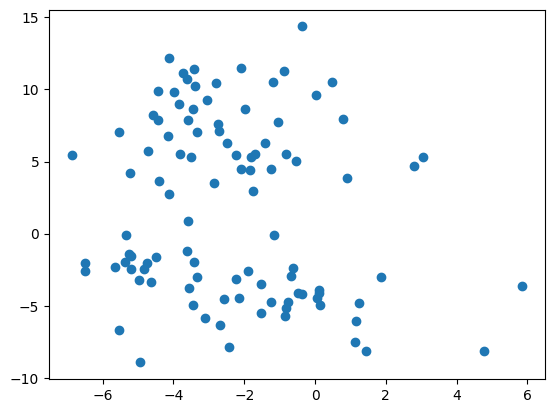

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

# Identify four points and create 25 points each around each center point within the standard deviation
X, y = make_blobs(n_samples = 100, 
                  n_features=2, 
                  centers=4, # number of clusters
                  cluster_std=1.8,
                  random_state=50)

plt.scatter(X[:,0], X[:,1])

### kMeans  

1. Determine num centeroids
2. randomly assign locations for centeroids
3. For each point...
    * Measure distance to each centeroid
    * Assign the point to the closest centeroid
4. Find the average location of all points in each cluster and move the centeroid there
5. Repeat steps 3 and 4 until the changes become small. (the dots don't change groups anymore)

In [36]:
### kMeans


# doing the kMeans model

In [37]:
from sklearn.cluster import KMeans

# create the model and fit it
n = 4

kmean = KMeans(n_clusters=n, 
               random_state=30,
               n_init='auto')    # auto means that it's just gonna auto keep going until the number of dots in each cluster stops changing
kmean.fit(X=X)


# tell us which group the data is in
# first points were in cluster 0, fourth was in cluster 1... etc
print(kmean.labels_)

[0 0 0 1 2 2 3 1 0 1 2 0 1 3 2 3 3 3 1 1 0 2 2 0 3 3 0 2 2 1 1 0 2 3 0 2 1
 1 0 0 2 2 2 0 1 3 0 2 2 1 1 2 3 3 1 1 0 3 0 0 1 1 3 2 0 1 1 1 1 1 1 2 1 0
 0 3 1 2 1 2 0 0 3 1 3 3 1 0 2 2 1 2 2 2 1 0 1 2 3 3]


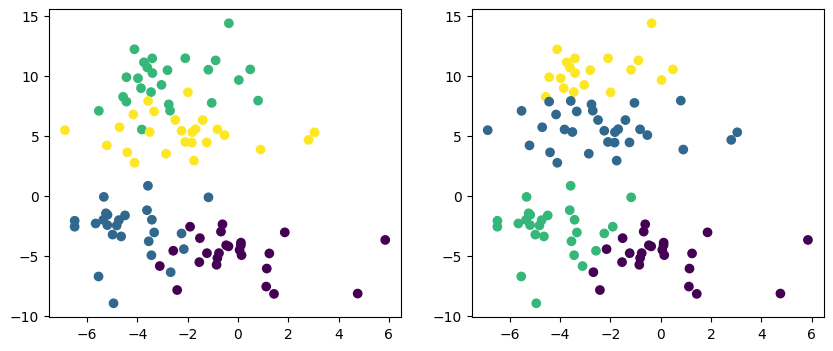

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# see results
ax[1].scatter(X[:,0], X[:,1], c=kmean.labels_)
ax[0].scatter(X[:,0], X[:,1], c=y)


In [39]:
# measure how good it was
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y, kmean.labels_))

[[22  0  3  0]
 [ 2  0 23  0]
 [ 0  7  0 18]
 [ 0 24  0  1]]


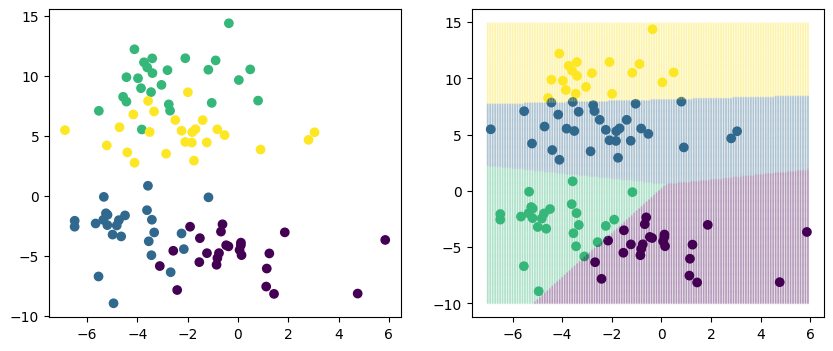

In [40]:
X_test, y_test = np.meshgrid(np.arange(-7,6,0.1), np.arange(-10, 15, 0.1))
X_test = np.array([X_test.flatten(), y_test.flatten()]).T

y_pred = kmean.predict(X_test)


# see results
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[1].scatter(X[:,0], X[:,1], c=kmean.labels_)
ax[0].scatter(X[:,0], X[:,1], c=y)

ax[1].scatter(X_test[:,0], X_test[:,1], alpha=0.25, marker='.', s=1, c=y_pred)
